<a href="https://colab.research.google.com/github/victor-octavio/processamento-de-imagens/blob/Aula_3/Aula_histograma_RGB_Comentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equalising a Color Image Histogram

In [8]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import imageio

#colorimage = cv2.imread("lena.png")
colorimage = imageio.imread('lena.png')

<ipython-input-8-78d2cd2cc8b6>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  colorimage = imageio.imread('lena.png')


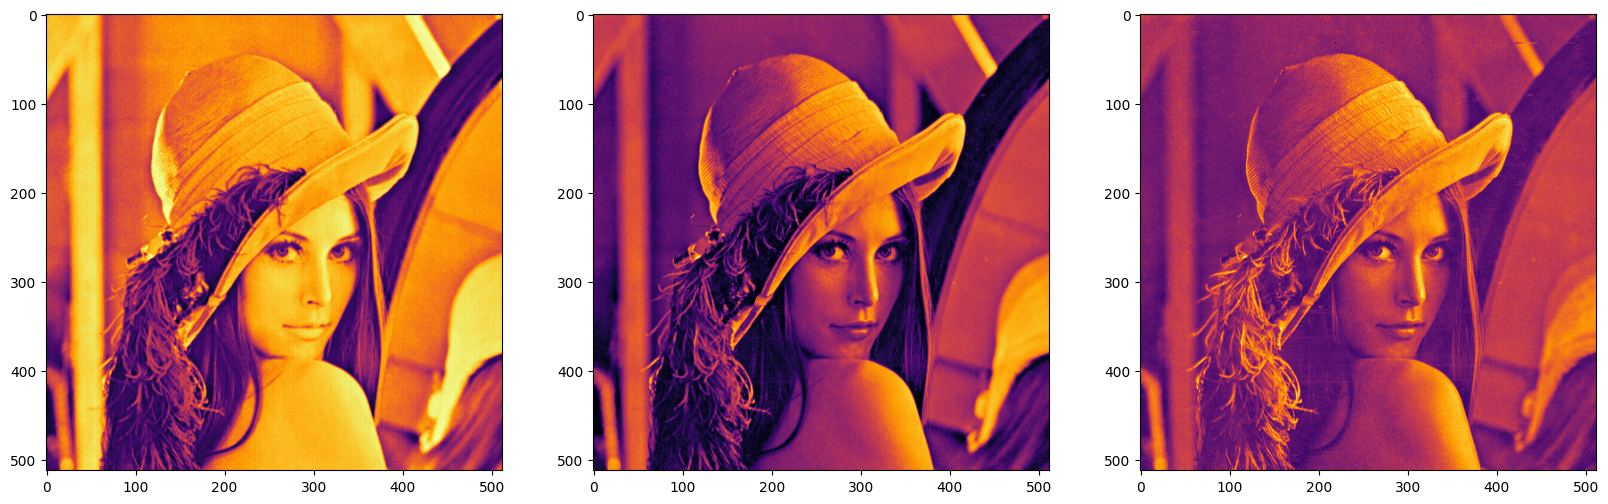

In [39]:
figure, axarr = plt.subplots(1,3, figsize=(20,20))
axarr[0].imshow(colorimage[:,:,0], cmap = 'inferno')
axarr[1].imshow(colorimage[:,:,1], cmap = 'inferno')
axarr[2].imshow(colorimage[:,:,2], cmap = 'inferno')

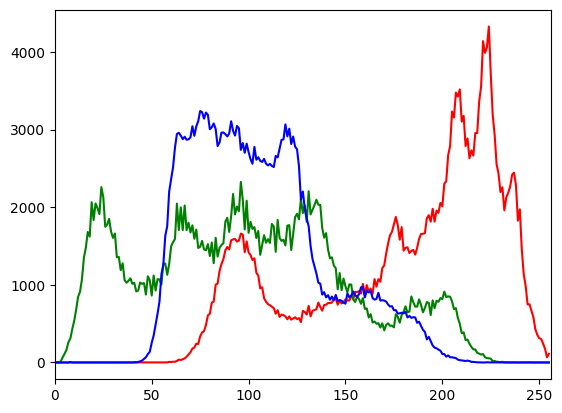

In [10]:
color = ('r','g','b')
#color = ('b','g','r')  #OpenCV follows BGR order, while matplotlib likely follows RGB order

#Loop through each color sequentially
for i,col in enumerate(color):

    #To use OpenCV's calcHist function, uncomment below
    #histr = cv2.calcHist([colorimage],[i],None,[256],[0,256])

    #To use numpy histogram function, uncomment below
    histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])

    plt.plot(histr,color = col)  #Add histogram to our plot
    plt.xlim([0,256])

plt.show()  #Show our plot

In [11]:
# For ease of understanding, we explicitly equalize each channel individually
colorimage_b = cv2.equalizeHist(colorimage[:,:,0])
colorimage_g = cv2.equalizeHist(colorimage[:,:,1])
colorimage_r = cv2.equalizeHist(colorimage[:,:,2])

# Next we stack our equalized channels back into a single image
colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
colorimage_e.shape

(512, 512, 3)

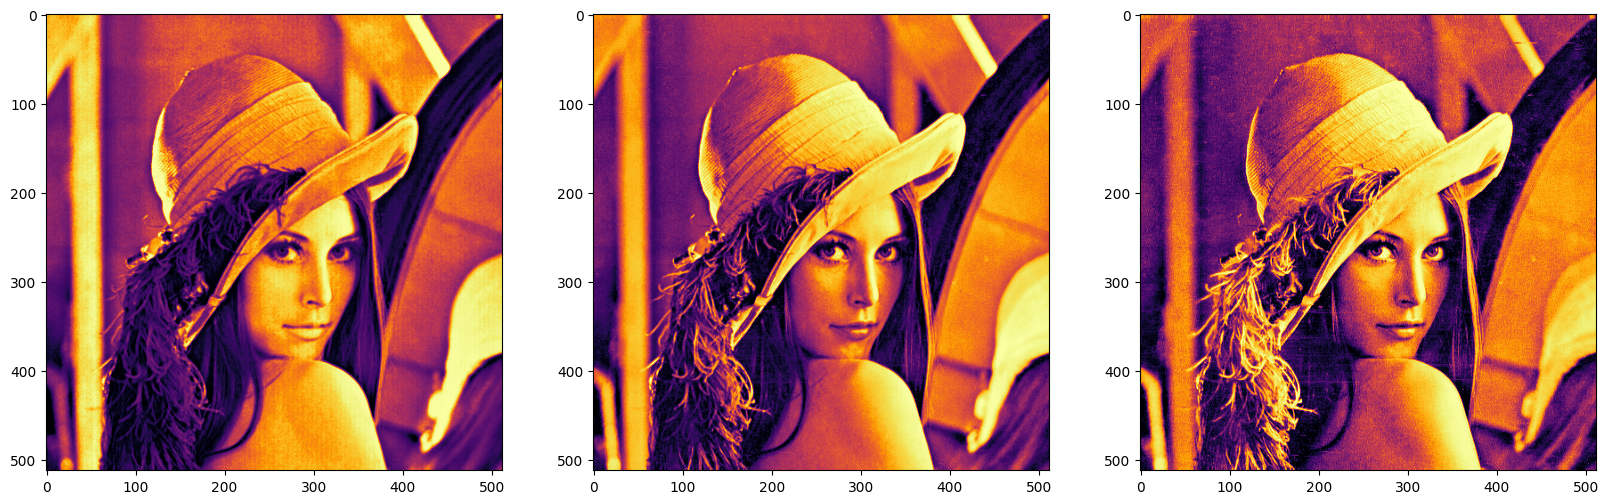

In [40]:
figure, axarr = plt.subplots(1,3, figsize=(20,20))
axarr[0].imshow(colorimage_e[:,:,0], cmap = 'inferno')
axarr[1].imshow(colorimage_e[:,:,1], cmap = 'inferno')
axarr[2].imshow(colorimage_e[:,:,2], cmap = 'inferno')

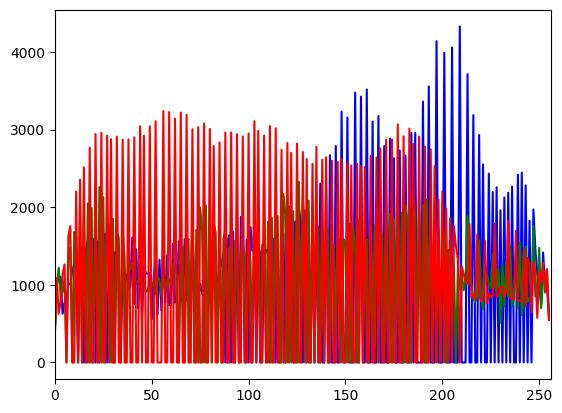

In [13]:
# Using Numpy to calculate the histogram
color = ('b','g','r')
for i,col in enumerate(color):
    histr, _ = np.histogram(colorimage_e[:,:,i],256,[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


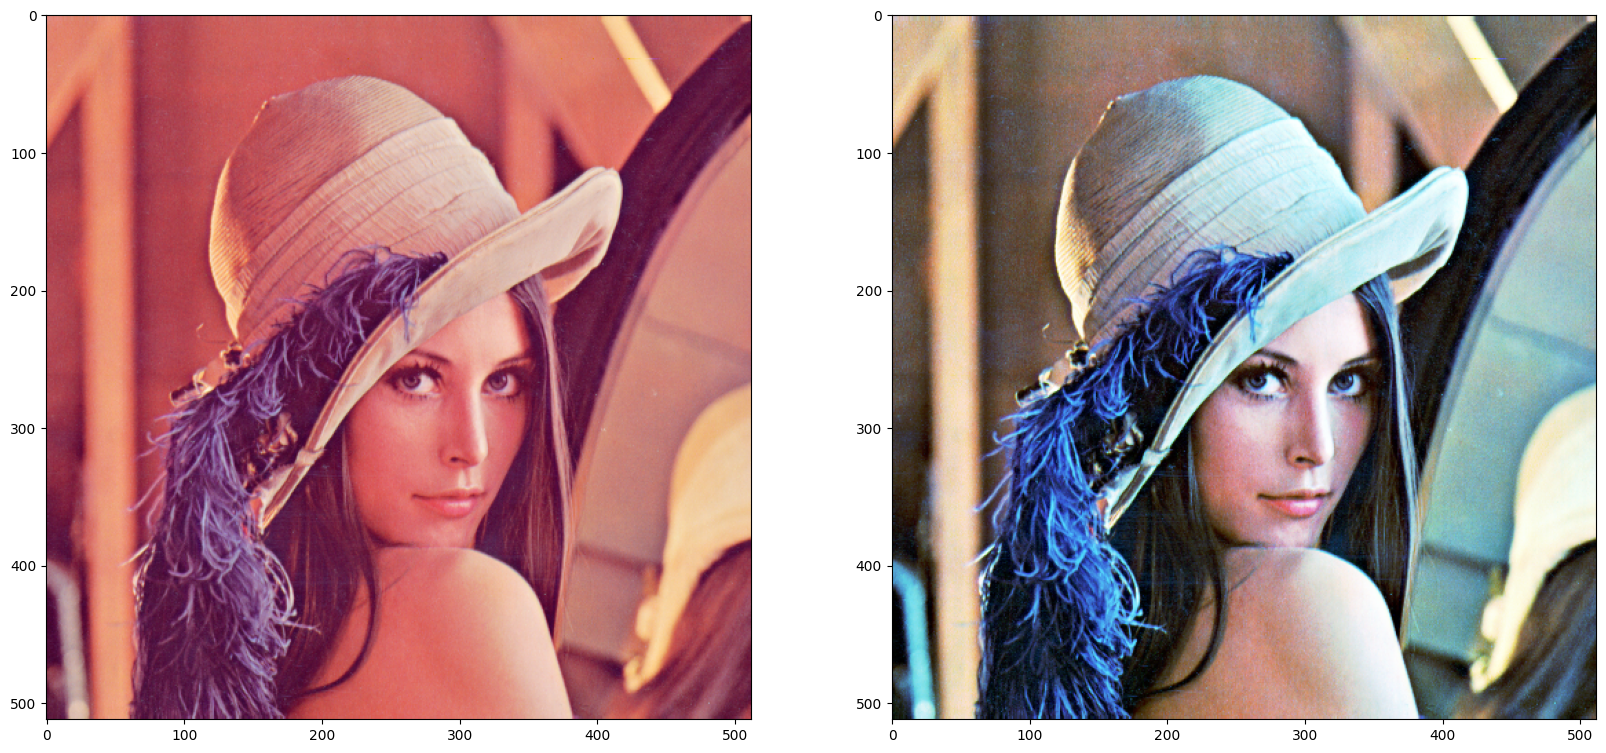

In [14]:
figure, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(colorimage)
axarr[1].imshow(colorimage_e)


In [15]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-16-901fe4baeda3>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('lena.png')


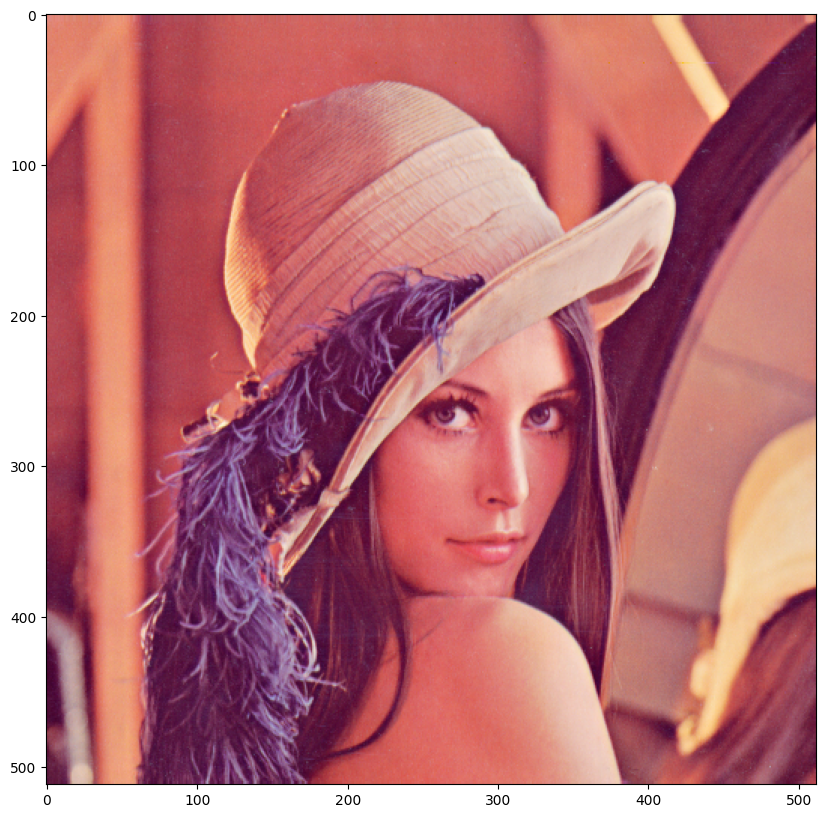

In [16]:
img = imageio.imread('lena.png')
plt.figure(figsize = (10,10))
plt.imshow(img)

In [17]:
print('Shape of the image : {}'.format(img.shape))
print('Image Hight {}'.format(img.shape[0]))
print('Image Width {}'.format(img.shape[1]))
print('Dimension of Image {}'.format(img.ndim))

Shape of the image : (512, 512, 3)
Image Hight 512
Image Width 512
Dimension of Image 3


In [18]:
'''
Let's pick a specific pixel located at 100 th Rows and 50 th Column.
And view the RGB value gradually.

'''
img[100, 50]

#voce irá obserar que teremos muito "vermelho" neste pixel

array([232, 140, 120], dtype=uint8)

In [19]:
# A specific pixel located at Row : 100 ; Column : 50
# Each channel's value of it, gradually R , G , B --> Using imageio
print('Value of only R channel {}'.format(img[ 100, 50, 0]))
print('Value of only G channel {}'.format(img[ 100, 50, 1]))
print('Value of only B channel {}'.format(img[ 100, 50, 2]))

# Mas é bom saber que no OpenCV, as imagens não são RGB, mas BGR. imageio.imread carrega a imagem como RGB

Value of only R channel 232
Value of only G channel 140
Value of only B channel 120


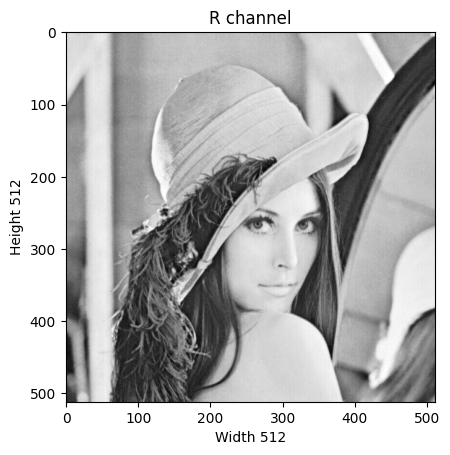

In [20]:
plt.title('R channel')
plt.ylabel('Height {}'.format(img.shape[0]))
plt.xlabel('Width {}'.format(img.shape[1]))

plt.imshow(img[ : , : , 0], cmap='gray') #plt.imshow(img[todos pixels (:), todos pixels(:), camada R (0)], cmap= paleta de cor)
plt.show()

In [21]:
img[ : , : , 0]

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

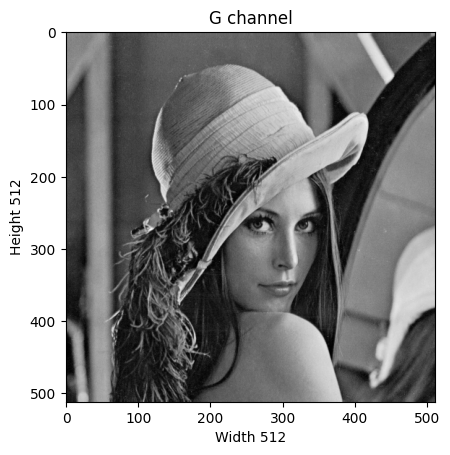

In [22]:
plt.title('G channel')
plt.ylabel('Height {}'.format(img.shape[0]))
plt.xlabel('Width {}'.format(img.shape[1]))

plt.imshow(img[ : , : , 1], cmap='gray')
plt.show()


In [23]:
img[ : , : , 1]

array([[137, 137, 137, ..., 148, 130,  99],
       [137, 137, 137, ..., 148, 130,  99],
       [137, 137, 137, ..., 148, 130,  99],
       ...,
       [ 18,  18,  27, ...,  73,  68,  62],
       [ 22,  22,  32, ...,  70,  71,  74],
       [ 22,  22,  32, ...,  70,  71,  74]], dtype=uint8)

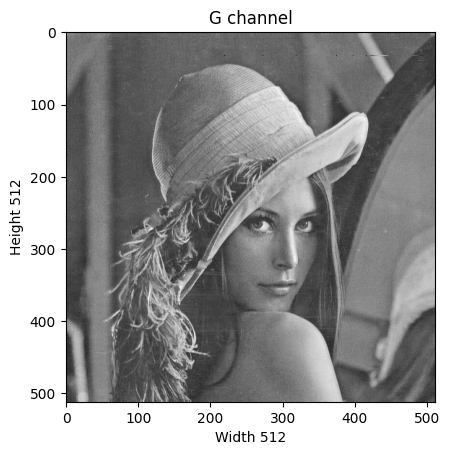

In [24]:
plt.title('G channel')
plt.ylabel('Height {}'.format(img.shape[0]))
plt.xlabel('Width {}'.format(img.shape[1]))

plt.imshow(img[ : , : , 2], cmap='gray')
plt.show()


# Dividindo Camadas:
Agora, sabemos que cada pixel da imagem é representado por três inteiros. Dividir a imagem em componentes de cores separados é apenas uma questão de extrair a fatia correta da matriz de imagens.

In [25]:
split_img = np.zeros(img.shape, dtype="uint8") #Criando uma matriz vazia de 0 --> de Dimensão 512x512

In [26]:
#visualizando o canal RED, por ex:
split_img[ :, :, 0] = img[ :, :, 0] #Preenchendo a matriz split_img zerada com a matriz referente a camada R da imagem

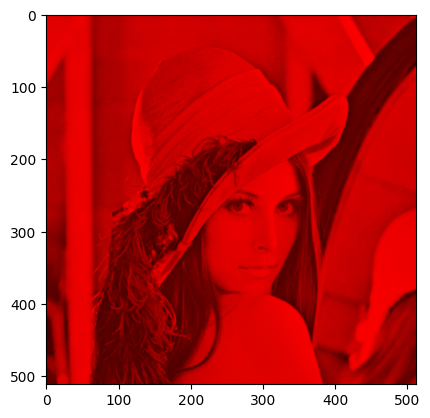

In [27]:
plt.imshow(split_img)
plt.show()


In [28]:
split_img

array([[[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       [[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       [[226,   0,   0],
        [226,   0,   0],
        [223,   0,   0],
        ...,
        [230,   0,   0],
        [221,   0,   0],
        [200,   0,   0]],

       ...,

       [[ 84,   0,   0],
        [ 84,   0,   0],
        [ 92,   0,   0],
        ...,
        [173,   0,   0],
        [172,   0,   0],
        [177,   0,   0]],

       [[ 82,   0,   0],
        [ 82,   0,   0],
        [ 96,   0,   0],
        ...,
        [179,   0,   0],
        [181,   0,   0],
        [185,   0,   0]],

       [[ 82,   0,   0],
        [ 82,   0,   0],
        [ 96,   0,   0],
        ...,
        [179,   0,   0],
        [181,   0,   0],
        [185,   0,   0]]

In [29]:
split_img[100, 50]

array([232,   0,   0], dtype=uint8)

<ipython-input-30-e1c44cf2e268>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('lena.png')


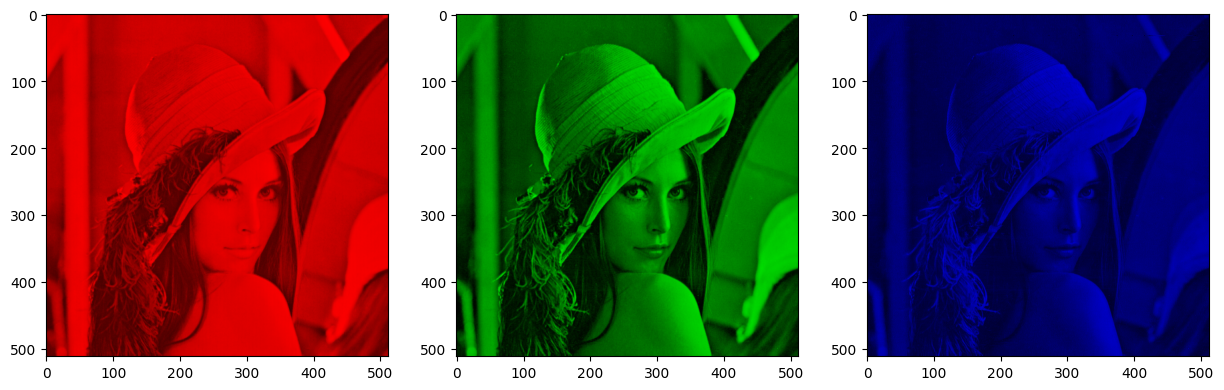

In [30]:
import numpy as np

img = imageio.imread('lena.png')


fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):

    # criando uma matriz de zeros
    split_img = np.zeros(img.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'

    # avaliando cada canal
    split_img[ :, :, c] = img[ :, :, c]

    # display each channel
    ax.imshow(split_img)
